In [1]:
import pandas as pd

# Load the JSON file
df = pd.read_json("../data/News_Category_Dataset_v3.json", lines=True)  # 'lines=True' is needed for JSON lines format

# Display the first few rows
df.head()

,link,headline,category,short_description,authors,date
0,https://www.huffpost.com/entry/covid-boosters-...,Over 4 Million Americans Roll Up Sleeves For O...,U.S. NEWS,Health experts said it is too early to predict...,"Carla K. Johnson, AP",2022-09-23
1,https://www.huffpost.com/entry/american-airlin...,"American Airlines Flyer Charged, Banned For Li...",U.S. NEWS,He was subdued by passengers and crew when he ...,Mary Papenfuss,2022-09-23
2,https://www.huffpost.com/entry/funniest-tweets...,23 Of The Funniest Tweets About Cats And Dogs ...,COMEDY,"""Until you have a dog you don't understand wha...",Elyse Wanshel,2022-09-23
3,https://www.huffpost.com/entry/funniest-parent...,The Funniest Tweets From Parents This Week (Se...,PARENTING,"""Accidentally put grown-up toothpaste on my to...",Caroline Bologna,2022-09-23
4,https://www.huffpost.com/entry/amy-cooper-lose...,Woman Who Called Cops On Black Bird-Watcher Lo...,U.S. NEWS,Amy Cooper accused investment firm Franklin Te...,Nina Golgowski,2022-09-22


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209527 entries, 0 to 209526
Data columns (total 6 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   link               209527 non-null  object        
 1   headline           209527 non-null  object        
 2   category           209527 non-null  object        
 3   short_description  209527 non-null  object        
 4   authors            209527 non-null  object        
 5   date               209527 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(5)
memory usage: 9.6+ MB


In [3]:
df = df.dropna(subset=['headline'])  # Drop rows where 'headline' is NaN


In [4]:
df = df.drop_duplicates(subset=['headline'])


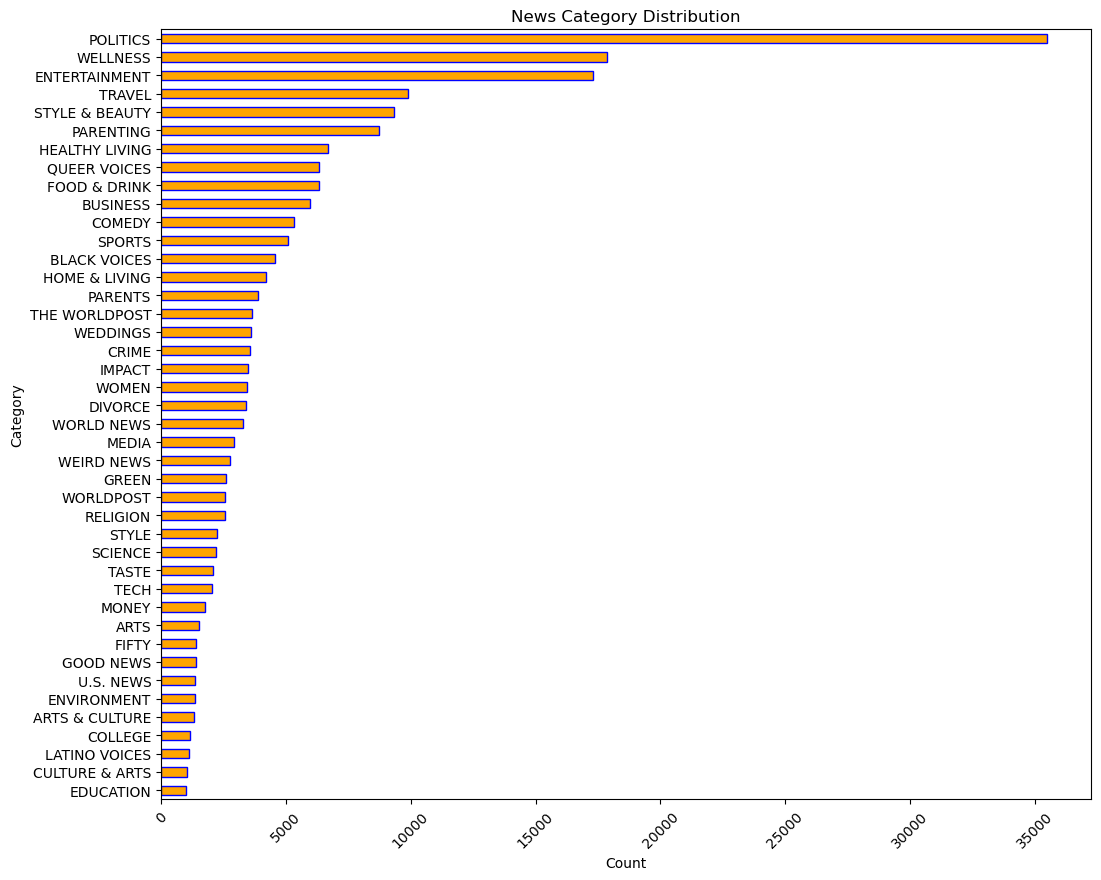

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,10))
df['category'].value_counts().sort_values(ascending=True).plot(kind='barh', color='orange', edgecolor='blue')

plt.title('News Category Distribution')
plt.ylabel('Category')
plt.xlabel('Count')
plt.xticks(rotation=45)  # Rotate category labels for better readability
plt.show()


#df['category'].value_counts().plot(kind='bar')

In [6]:
df['headline_length'] = df['headline'].apply(lambda x: len(x.split()))
df['headline_length'].describe()

count    207996.000000
mean          9.611560
std           3.064676
min           0.000000
25%           8.000000
50%          10.000000
75%          12.000000
max          44.000000
Name: headline_length, dtype: float64

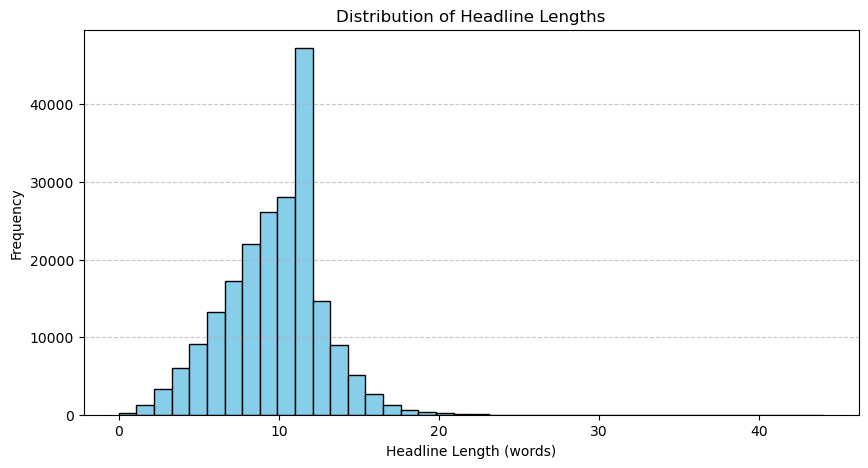

In [7]:
plt.figure(figsize=(10,5))
plt.hist(df['headline_length'], bins=40, color='skyblue', edgecolor='black')
plt.xlabel("Headline Length (words)")
plt.ylabel("Frequency")
plt.title("Distribution of Headline Lengths")
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

In [8]:
df['headline'] = df['headline'].str.strip()

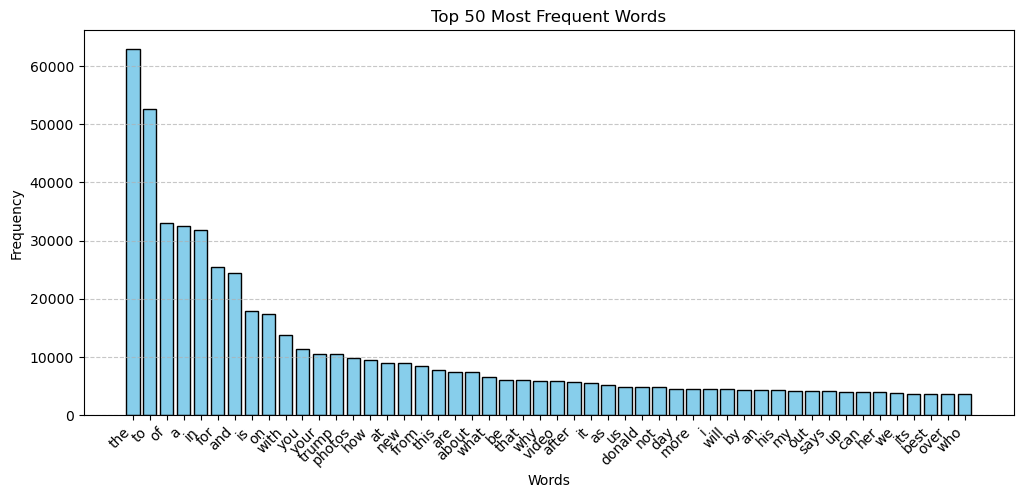

In [12]:
import matplotlib.pyplot as plt
import pandas as pd

# Convert word frequencies to DataFrame and sort
word_freqs = pd.Series(word_counts).sort_values(ascending=False).head(50)

# Create Matplotlib bar chart
plt.figure(figsize=(12, 5))
plt.bar(word_freqs.index, word_freqs.values, color='skyblue', edgecolor='black')

# Labels and title
plt.title("Top 50 Most Frequent Words")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for readability
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Optional: Add gridlines for clarity

plt.show()


[nltk_data] Downloading package stopwords to
[nltk_data]     /home/adma224/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


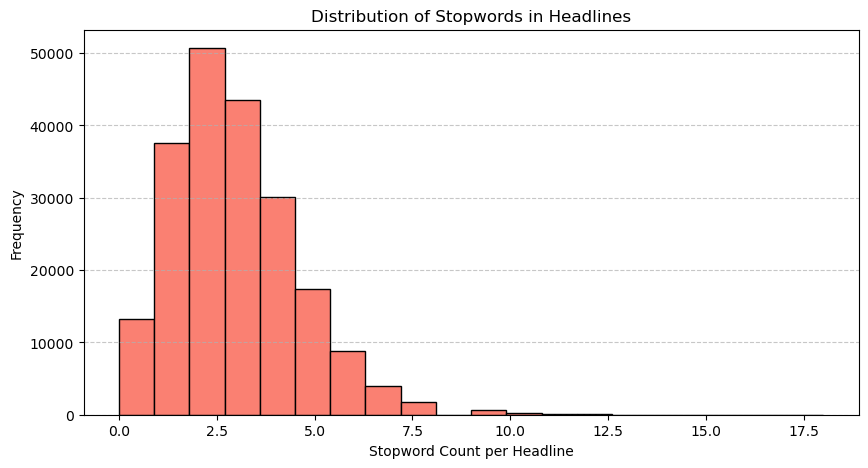

In [13]:
import matplotlib.pyplot as plt
import nltk

# Download stopwords (only needed once)
nltk.download('stopwords')
from nltk.corpus import stopwords

# Load stopwords
stop_words = set(stopwords.words('english'))

# Compute stopword count per headline
df_lstm['stopword_count'] = df_lstm['headline'].apply(lambda x: sum(1 for word in x.split() if word in stop_words))

# Create Matplotlib histogram
plt.figure(figsize=(10, 5))
plt.hist(df_lstm['stopword_count'], bins=20, color='salmon', edgecolor='black')

# Labels and title
plt.xlabel("Stopword Count per Headline")
plt.ylabel("Frequency")
plt.title("Distribution of Stopwords in Headlines")
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Optional: Add gridlines for readability

plt.show()




Text(0.5, 1.0, 'Word Frequency Distribution (Log-Log Scale)')

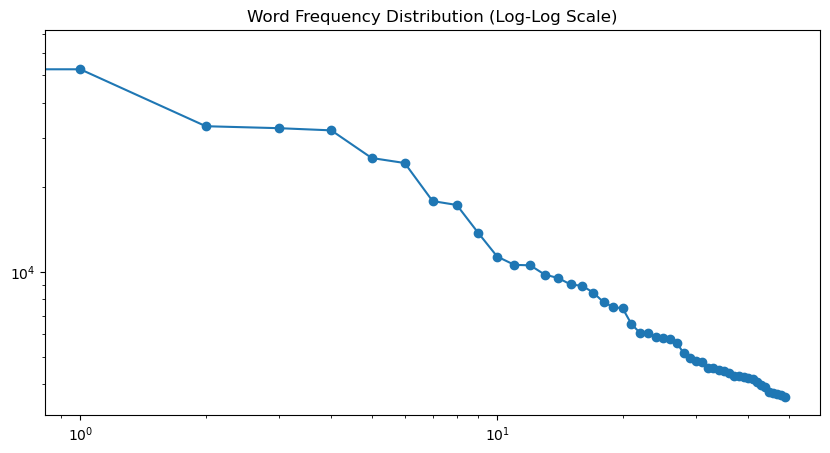

In [14]:
word_freqs.reset_index(drop=True).plot(logx=True, logy=True, marker='o', linestyle='-', figsize=(10,5))
plt.title("Word Frequency Distribution (Log-Log Scale)")


## Pre-processing for BERT



In [24]:
from transformers import BertTokenizer

df_bert = df[['headline']].copy()

# Load BERT tokenizer
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

# Tokenize headlines
df['tokenized'] = df['headline'].apply(lambda x: tokenizer.encode(x, add_special_tokens=True))

# Show an example
print(df['tokenized'].head())

0    [101, 2058, 1018, 2454, 4841, 4897, 2039, 1511...
1    [101, 2137, 7608, 23821, 5338, 1010, 7917, 200...
2    [101, 2603, 1997, 1996, 4569, 15580, 2102, 105...
3    [101, 1996, 4569, 15580, 2102, 1056, 28394, 32...
4    [101, 2450, 2040, 2170, 10558, 2006, 2304, 474...
Name: tokenized, dtype: object


In [25]:
import torch
print(torch.__version__)
print("CUDA Available:", torch.cuda.is_available())


ImportError: cannot import name 'TypeIs' from 'typing_extensions' (/home/adma224/anaconda3/lib/python3.11/site-packages/typing_extensions.py)

In [23]:
import torch

MAX_LEN = 50  # Adjust based on data

# Tokenize and pad sequences
encoded_inputs = tokenizer(
    df['headline'].tolist(), 
    padding="max_length", 
    truncation=True, 
    max_length=MAX_LEN, 
    return_tensors="pt"
)

# Extract BERT inputs
input_ids = encoded_inputs["input_ids"]
attention_mask = encoded_inputs["attention_mask"]

print("Input Shape:", input_ids.shape)
print("Attention Mask Shape:", attention_mask.shape)


ModuleNotFoundError: No module named 'torch'

## Preprocessing for GPT-2

GPT-2 uses subword tokenization (Byte-Pair Encoding, BPE) instead of word-based tokenization.
It requires special tokens (`<bos>` and `<eos>`).

In [19]:
df_gpt2 = df[['headline']].copy()


In [20]:
from transformers import GPT2Tokenizer

tokenizer = GPT2Tokenizer.from_pretrained("gpt2")

# Add special tokens
df_gpt2['tokenized'] = df['headline'].copy().apply(lambda x: tokenizer.encode(x, add_special_tokens=True))


In [21]:
max_length = max(len(tokens) for tokens in df_gpt2['tokenized'])
df_gpt2['padded'] = df_gpt2['tokenized'].apply(lambda x: x[:max_length] if len(x) > max_length else x + [tokenizer.pad_token_id] * (max_length - len(x)))


In [22]:
df_gpt2[['headline', 'tokenized']].to_json("../data/gpt2_dataset.json", orient="records", lines=True)